# 5. Graficando datos


In [44]:
# Importando liberias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

In [45]:
# Leyendo el dataset
ruta = "..//../results/WHCd_Juarez_clean.csv"
datajuarez = pd.read_csv(ruta)
datajuarez.head(10)

,fecha,viento_U,viento_V,pto_rocio,tem_viento,alt_nube,evaporacion,rafaga_viento,evap_media,evap_media_potencial,pm_nivel_del_mar,evap_potencial,tip_precipitacion,temp_del_suelo,agua_del_suelo,nubosidad,precip_acum_x_hora,angulo_viento,dir_viento,vel_viento
0,01/01/2000,-1.669281,-0.020920,7.480493,17.317834,1907.450439,-7.220000e-06,2.148321,-2.000000e-06,-3.470000e-06,1012.635625,-1.250000e-05,sin precipitaciones,13.064264,0.137127,0.152496,0.0,89,este,1.669412
1,01/01/2000,-1.951294,-0.468689,8.055566,16.767297,2135.849121,-1.550000e-06,2.747254,-4.300000e-07,-1.910000e-07,1012.456250,-6.860000e-07,sin precipitaciones,12.453210,0.137084,0.236725,0.0,76,este,2.006793
2,01/01/2000,-1.763443,-0.294388,5.953119,14.243799,2208.853027,-4.540000e-07,2.561296,-1.230000e-07,1.860000e-07,1012.368125,6.660000e-07,sin precipitaciones,10.392664,0.137066,0.579987,0.0,81,este,1.787847
3,01/01/2000,-1.436081,0.382751,5.892938,11.471796,7484.599609,3.110000e-07,2.200583,8.660000e-08,3.350000e-07,1012.543125,1.220000e-06,sin precipitaciones,8.273584,0.137028,0.482239,0.0,105,este,1.486212
4,01/01/2000,-0.908798,1.725983,5.761438,11.316980,4100.225235,6.010000e-07,2.526732,1.660000e-07,3.180000e-07,1012.673750,1.130000e-06,sin precipitaciones,7.544336,0.137005,0.411499,0.0,152,sureste,1.950623
5,01/01/2000,-0.377380,2.554306,5.132959,9.031458,4100.225235,1.440000e-06,3.777871,3.940000e-07,6.380000e-07,1012.659375,2.290000e-06,sin precipitaciones,6.913049,0.136968,0.614685,0.0,172,sur,2.582033
6,01/01/2000,0.356659,2.629395,4.263757,7.635492,4100.225235,2.260000e-06,4.538428,6.250000e-07,9.710000e-07,1012.491250,3.490000e-06,sin precipitaciones,6.220911,0.136947,0.535614,0.0,188,sur,2.653473
7,01/01/2000,1.176437,2.084335,3.994012,7.308130,2290.968262,1.700000e-06,4.661475,4.710000e-07,8.200000e-07,1012.315000,2.970000e-06,sin precipitaciones,5.943872,0.136921,0.141052,0.0,209,sudoeste,2.393420
8,01/01/2000,1.626434,1.169067,4.224725,7.595605,2288.184326,2.120000e-06,4.536755,5.900000e-07,8.530000e-07,1012.189375,3.070000e-06,sin precipitaciones,5.993433,0.136891,0.577209,0.0,234,sudoeste,2.003000
9,01/01/2000,1.527802,0.984741,4.503931,7.604150,2202.159912,1.690000e-06,4.077042,4.710000e-07,6.850000e-07,1011.985000,2.480000e-06,sin precipitaciones,5.963464,0.136874,0.652557,0.0,237,sudoeste,1.817661


In [46]:
# Flitramos las columnas numericas para hacer los mapas de calos
filtro = ['viento_U', 'viento_V', 'pto_rocio', 'tem_viento', 'alt_nube', 'evaporacion', 'rafaga_viento', 'evap_media', 'evap_media_potencial',
          'pm_nivel_del_mar', 'evap_potencial', 'temp_del_suelo', 'agua_del_suelo', 'nubosidad', 'precip_acum_x_hora', 'angulo_viento', 'vel_viento']
datajuarez = datajuarez[filtro]

datajuarez

,viento_U,viento_V,pto_rocio,tem_viento,alt_nube,evaporacion,rafaga_viento,evap_media,evap_media_potencial,pm_nivel_del_mar,evap_potencial,temp_del_suelo,agua_del_suelo,nubosidad,precip_acum_x_hora,angulo_viento,vel_viento
0,-1.669281,-0.020920,7.480493,17.317834,1907.450439,-7.220000e-06,2.148321,-2.000000e-06,-3.470000e-06,1012.635625,-1.250000e-05,13.064264,0.137127,0.152496,0.0,89,1.669412
1,-1.951294,-0.468689,8.055566,16.767297,2135.849121,-1.550000e-06,2.747254,-4.300000e-07,-1.910000e-07,1012.456250,-6.860000e-07,12.453210,0.137084,0.236725,0.0,76,2.006793
2,-1.763443,-0.294388,5.953119,14.243799,2208.853027,-4.540000e-07,2.561296,-1.230000e-07,1.860000e-07,1012.368125,6.660000e-07,10.392664,0.137066,0.579987,0.0,81,1.787847
3,-1.436081,0.382751,5.892938,11.471796,7484.599609,3.110000e-07,2.200583,8.660000e-08,3.350000e-07,1012.543125,1.220000e-06,8.273584,0.137028,0.482239,0.0,105,1.486212
4,-0.908798,1.725983,5.761438,11.316980,4100.225235,6.010000e-07,2.526732,1.660000e-07,3.180000e-07,1012.673750,1.130000e-06,7.544336,0.137005,0.411499,0.0,152,1.950623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209419,-4.508682,-1.726181,-3.329810,13.518884,4100.225235,-3.110000e-06,9.593543,-8.650000e-07,-1.063840e-04,1030.222500,-3.829920e-04,17.696588,0.020139,0.000000,0.0,69,4.827827
209420,-4.233658,-1.368073,-4.782263,14.668604,4100.225235,-3.420000e-06,9.073844,-9.440000e-07,-1.118720e-04,1028.726250,-4.027310e-04,19.484338,0.020118,0.000000,0.0,72,4.449211
209421,-3.999023,-1.495728,-4.893713,14.651178,4100.225235,-3.310000e-06,8.597941,-9.180000e-07,-1.065430e-04,1027.871250,-3.835600e-04,20.341638,0.020103,0.003754,0.0,69,4.269589
209422,-3.011124,-0.653152,-5.236304,14.799158,4100.225235,-2.760000e-06,7.853645,-7.660000e-07,-9.140000e-05,1027.091250,-3.290460e-04,20.343286,0.020072,0.005646,0.0,78,3.081148


## 5.1 Matriz de correlación

Una matriz de correlación es una herramienta estadística que muestra la intensidad y la dirección de la relación entre dos o más variables. Se utiliza mucho en campos como las finanzas, la economía, la psicología y la biología, porque ayuda a entender cómo se relacionan entre sí distintas cosas.


In [47]:
# Creando la matriz de coorrelacion
print("Matriz de correlacion\n")
matriz_correlacion = datajuarez.corr().round(2)
matriz_correlacion

Matriz de correlacion



,viento_U,viento_V,pto_rocio,tem_viento,alt_nube,evaporacion,rafaga_viento,evap_media,evap_media_potencial,pm_nivel_del_mar,evap_potencial,temp_del_suelo,agua_del_suelo,nubosidad,precip_acum_x_hora,angulo_viento,vel_viento
viento_U,1.00,-0.05,-0.28,0.06,0.10,0.03,0.30,0.03,-0.17,-0.45,-0.17,0.03,-0.09,-0.12,-0.07,0.74,0.28
viento_V,-0.05,1.00,0.14,0.23,0.06,-0.03,0.14,-0.03,-0.17,-0.25,-0.17,0.21,-0.07,0.04,-0.03,-0.02,0.13
pto_rocio,-0.28,0.14,1.00,0.48,-0.31,-0.30,-0.04,-0.30,-0.10,-0.17,-0.10,0.47,0.31,0.20,0.16,-0.21,-0.08
tem_viento,0.06,0.23,0.48,1.00,-0.00,-0.14,0.26,-0.14,-0.63,-0.64,-0.63,0.97,-0.21,-0.01,-0.02,0.08,0.16
alt_nube,0.10,0.06,-0.31,-0.00,1.00,0.22,-0.10,0.22,0.02,-0.04,0.02,-0.05,-0.28,0.11,-0.19,0.09,-0.08
evaporacion,0.03,-0.03,-0.30,-0.14,0.22,1.00,-0.10,1.00,0.27,-0.01,0.27,-0.15,-0.44,-0.09,-0.11,0.01,-0.02
rafaga_viento,0.30,0.14,-0.04,0.26,-0.10,-0.10,1.00,-0.10,-0.50,-0.29,-0.50,0.28,-0.12,0.00,0.02,0.17,0.92
evap_media,0.03,-0.03,-0.30,-0.14,0.22,1.00,-0.10,1.00,0.27,-0.01,0.27,-0.15,-0.44,-0.09,-0.11,0.01,-0.02
evap_media_potencial,-0.17,-0.17,-0.10,-0.63,0.02,0.27,-0.50,0.27,1.00,0.30,1.00,-0.70,0.16,0.07,0.05,-0.12,-0.32
pm_nivel_del_mar,-0.45,-0.25,-0.17,-0.64,-0.04,-0.01,-0.29,-0.01,0.30,1.00,0.30,-0.59,0.19,0.02,0.02,-0.37,-0.26


## 5.2 Mapa de Calor con Seaborn usando **heatmap**

La función **heatmap** permite crear mapas de calor o gráficos de correlación en Python con seaborn. Puedes pasar un conjunto de datos 2D o un data frame de pandas. En caso de utilizar un data frame de pandas los nombres de las filas y las columnas serán usados como etiquetas para los ejes.


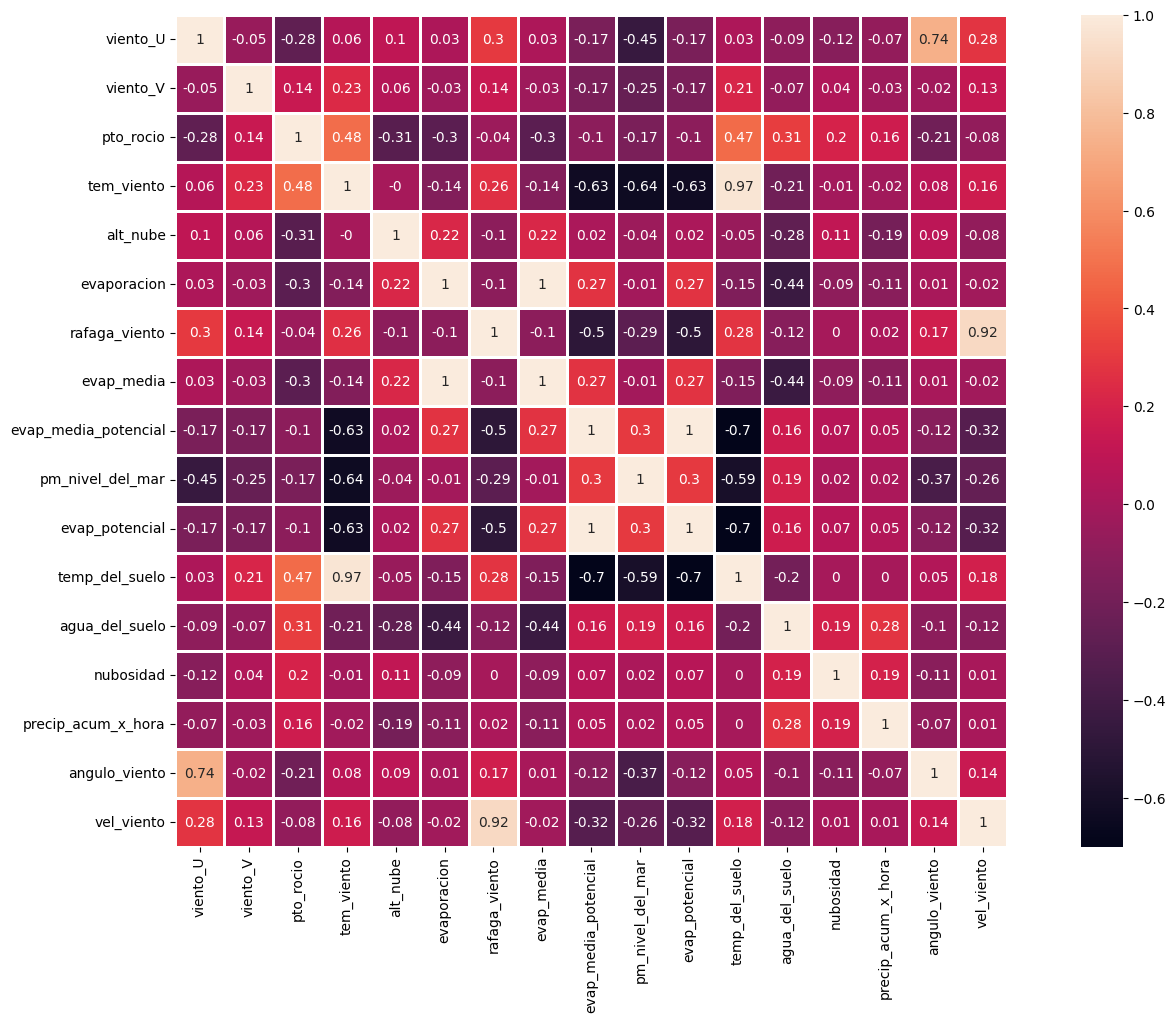

In [62]:
plt.figure(figsize=(19.20, 10.80))
sns.heatmap(data=matriz_correlacion,
            annot=True,
            square=True,
            annot_kws={'size': 10},
            linecolor='white',
            linewidths=0.75)
plt.show()

## 5.2.1 Correlación de la Temp. del suelo y la Evaporación

<Figure size 1920x1080 with 0 Axes>

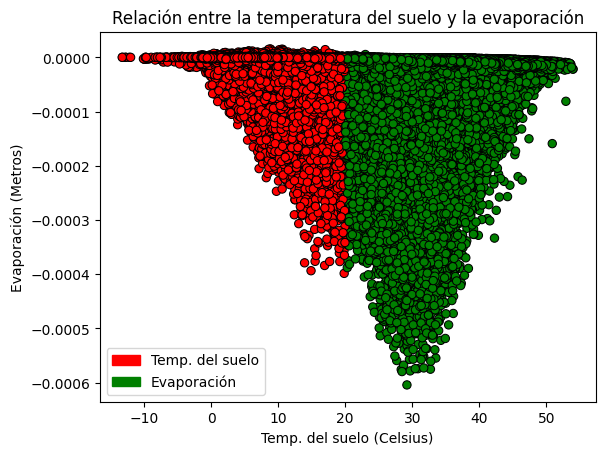

In [64]:
# Datos
x = datajuarez['temp_del_suelo']
y = datajuarez['evaporacion']
color = np.where(x < 20, "red", "green")

# Grafico
plt.figure(figsize=(19.20, 10.80)) # cmabiar el tamaño de grafico en pixeles H x L
fig, ax = plt.subplots()
ax.scatter(x, y, c=color,
           label=color,
           edgecolors="black",
           linewidths=0.75)

# Etiquetas de la leyenda
rojo = mpatches.Patch(color="red", label="Temp. del suelo")
verde = mpatches.Patch(color="green", label="Evaporación")
plt.xlabel('Temp. del suelo (Celsius)')
plt.ylabel('Evaporación (Metros)')
plt.title("Relación entre la temperatura del suelo y la evaporación")

# Leyenda
plt.legend(handles=[rojo, verde])

## 5.2.3 Relación entre la **Nubosidad** y la **Altura de las Nubes**

<Figure size 1920x1080 with 0 Axes>

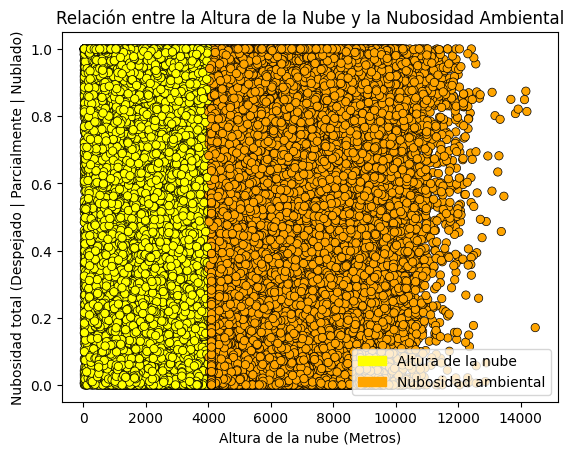

In [68]:
# Datos
x = datajuarez['alt_nube']
y = datajuarez['nubosidad']
color = np.where(x < 4000, "yellow", "orange")

# Grafico
# cmabiar el tamaño de grafico en pixeles H x L
plt.figure(figsize=(19.20, 10.80))
fig, ax = plt.subplots()
ax.scatter(x, y, c=color,
           label=color,
           edgecolors="black",
           linewidths=0.50)

# Etiquetas de la leyenda
amarillo = mpatches.Patch(color="yellow", label="Altura de la nube")
naranja = mpatches.Patch(color="orange", label="Nubosidad ambiental")
plt.xlabel('Altura de la nube (Metros)')
plt.ylabel('Nubosidad total (Despejado | Parcialmente | Nublado)')
plt.title("Relación entre la Altura de la Nube y la Nubosidad Ambiental")

# Leyenda
plt.legend(handles=[amarillo, naranja])